In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("/opt/ml/dataset/train/train.csv")
train_df

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [4]:
test_df = pd.read_csv("/opt/ml/dataset/test/test_data.csv")
test_df

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree
...,...,...,...,...,...,...
7760,7760,코로나19 방역 조치의 일환으로 국민의 움직임을 통제하려는 정부의 시도를 이탈리아 ...,"{'word': '정부', 'start_idx': 33, 'end_idx': 34,...","{'word': '이탈리아', 'start_idx': 41, 'end_idx': 4...",100,wikitree
7761,7761,선 연구원은 “위식도역류질환치료제인 케이캡이 92억원 판매되면서 2019년 연간 3...,"{'word': '종근당', 'start_idx': 133, 'end_idx': 1...","{'word': '전년', 'start_idx': 143, 'end_idx': 14...",100,wikitree
7762,7762,"한국전기안전공사(사장 조성완)는 8월 1일부로, 3급 간부직원에 대한 승진·이동 인...","{'word': '한국전기안전공사', 'start_idx': 0, 'end_idx'...","{'word': '조성완', 'start_idx': 12, 'end_idx': 14...",100,wikitree
7763,7763,1987년 B. 슈나이더(B. Schneider)에 의해 만들어졌다.,"{'word': 'B. 슈나이더', 'start_idx': 6, 'end_idx':...","{'word': '1987년', 'start_idx': 0, 'end_idx': 4...",100,wikipedia


In [5]:
train_df.columns

Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'], dtype='object')

In [6]:
train_df['label'].unique()

array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'per:date_of_birth',
       'org:place_of_headquarters', 'per:employee_of', 'per:origin',
       'per:title', 'org:members', 'per:schools_attended',
       'per:colleagues', 'per:alternate_names', 'per:spouse',
       'org:founded_by', 'org:political/religious_affiliation',
       'per:children', 'org:founded', 'org:number_of_employees/members',
       'per:place_of_birth', 'org:dissolved', 'per:parents',
       'per:religion', 'per:date_of_death', 'per:place_of_residence',
       'per:other_family', 'org:product', 'per:siblings', 'per:product',
       'per:place_of_death'], dtype=object)

In [7]:
train_df['source'].unique()

array(['wikipedia', 'wikitree', 'policy_briefing'], dtype=object)

In [8]:
# train_df.duplicated('sentence',keep=False)
train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity'],keep='first')]

,id,sentence,subject_entity,object_entity,label,source
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
7168,7168,"특히, KRI 한국기록원으로부터 2년 연속 공인중개사 최다 합격자 배출 기록을 공식...","{'word': '한국기록원', 'start_idx': 8, 'end_idx': 1...","{'word': 'KRI', 'start_idx': 4, 'end_idx': 6, ...",org:alternate_names,wikitree
8693,8693,김영삼 전 대통령은 2012년 7월 11일 김문수 새누리당 대선 경선후보의 예방에 ...,"{'word': '김문수', 'start_idx': 24, 'end_idx': 26...","{'word': '박근혜', 'start_idx': 47, 'end_idx': 49...",no_relation,wikipedia
10043,10043,특히 신분변화를 담고 있는데 1차 시도는 김영삼 정부 시절 해양수산부 장관이 각 지...,"{'word': '해운항만청', 'start_idx': 47, 'end_idx': ...","{'word': '해양수산부', 'start_idx': 33, 'end_idx': ...",org:member_of,wikipedia
10202,10202,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
10616,10616,"전현무 소속사 SM C&C는 ""'아나운서'라는 직업적 공통분모 속에서 선후배 간 좋...","{'word': '전현무', 'start_idx': 0, 'end_idx': 2, ...","{'word': 'SM C&C', 'start_idx': 8, 'end_idx': ...",per:employee_of,wikitree
12829,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
14094,14094,"석가제환인다라(釋迦提桓因陀羅)에서 석가는 샤크라(Śakra)의 음역어인데, 샤크라는...","{'word': '인드라', 'start_idx': 54, 'end_idx': 56...","{'word': 'Indra', 'start_idx': 58, 'end_idx': ...",per:alternate_names,wikipedia
14658,14658,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree


In [9]:
train_df.drop_duplicates(['sentence', 'subject_entity', 'object_entity'], keep='first')
print(train_df)
test_df.drop_duplicates(['sentence', 'subject_entity', 'object_entity'], keep='first')
print(test_df)

          id                                           sentence   
0          0  〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...  \
1          1  호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...   
2          2  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...   
3          3  균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...   
4          4  1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...   
...      ...                                                ...   
32465  32465  한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...   
32466  32466  법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...   
32467  32467  완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...   
32468  32468  중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...   
32469  32469  화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버...   

                                          subject_entity   
0      {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...  \
1      {'word': '민주평화당', 'start_idx': 19, 'end_idx': ...   
2      {'word':

{'no_relation': 9534, 'org:top_members/employees': 4284, 'per:employee_of': 3573, 'per:title': 2103, 'org:member_of': 1866, 'org:alternate_names': 1320, 'per:origin': 1234, 'org:place_of_headquarters': 1195, 'per:date_of_birth': 1130, 'per:alternate_names': 1001, 'per:spouse': 795, 'per:colleagues': 534, 'per:parents': 520, 'org:founded': 450, 'org:members': 420, 'per:date_of_death': 418, 'org:product': 380, 'per:children': 304, 'per:place_of_residence': 193, 'per:other_family': 190, 'per:place_of_birth': 166, 'org:founded_by': 155, 'per:product': 139, 'per:siblings': 136, 'org:political/religious_affiliation': 98, 'per:religion': 96, 'per:schools_attended': 82, 'org:dissolved': 66, 'org:number_of_employees/members': 48, 'per:place_of_death': 40}
label num :  30
new label num :  30


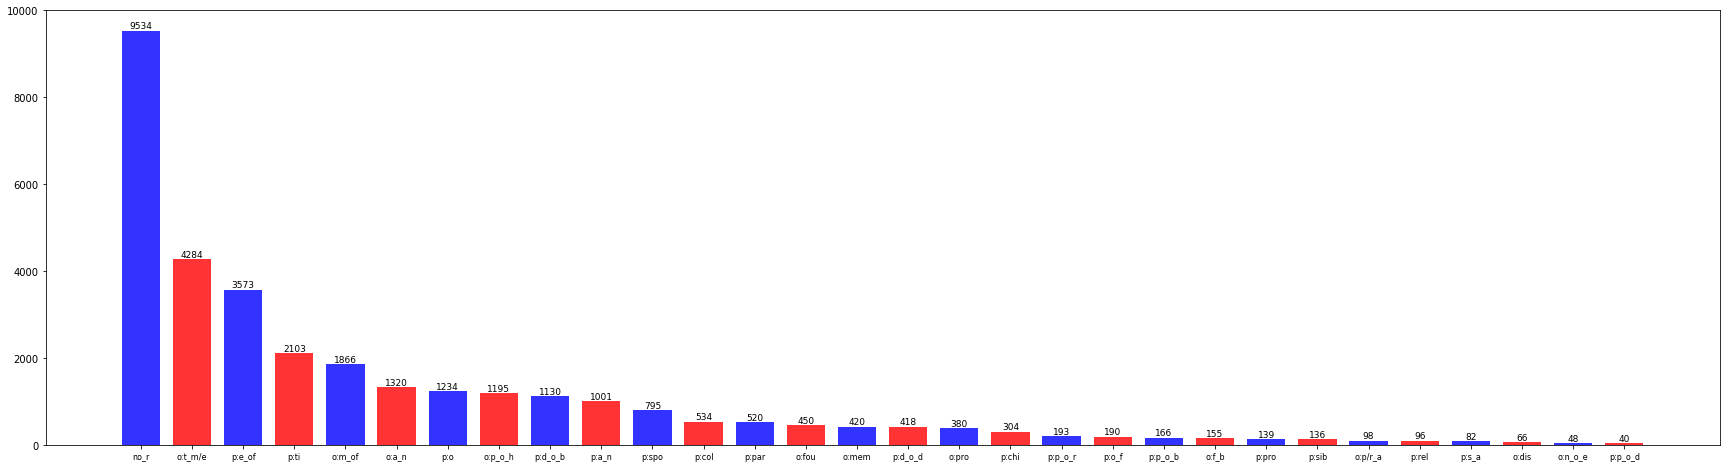

In [14]:
# train
train_label_count = train_df['label'].value_counts()
print(dict(train_label_count))
print('label num : ',len(train_label_count.keys()))
new_train_label = ['no_r', 'o:t_m/e', 'p:e_of', 'p:ti', 'o:m_of', 'o:a_n', 'p:o', 'o:p_o_h', 'p:d_o_b', 'p:a_n', 'p:spo', 'p:col', 'p:par', 'o:fou', 'o:mem', 'p:d_o_d', 'o:pro','p:chi', 'p:p_o_r', 'p:o_f', 'p:p_o_b', 'o:f_b', 'p:pro', 'p:sib', 'o:p/r_a', 'p:rel', 'p:s_a', 'o:dis', 'o:n_o_e', 'p:p_o_d']
print('new label num : ',len(new_train_label))
plt.figure(figsize=(30, 8))
label_index = [i for i in range(len(train_label_count.keys()))]
# print(train_label_count.values)
color_list = ['blue', 'red']*15
plt.bar(new_train_label, list(train_label_count.values), width=0.75, color=color_list, alpha=0.8)
plt.xticks(new_train_label, fontsize=8) # x축 값, 폰트 크기 설정
for i, v in enumerate(new_train_label):
    plt.text(v, train_label_count.values[i], train_label_count.values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

plt.show()

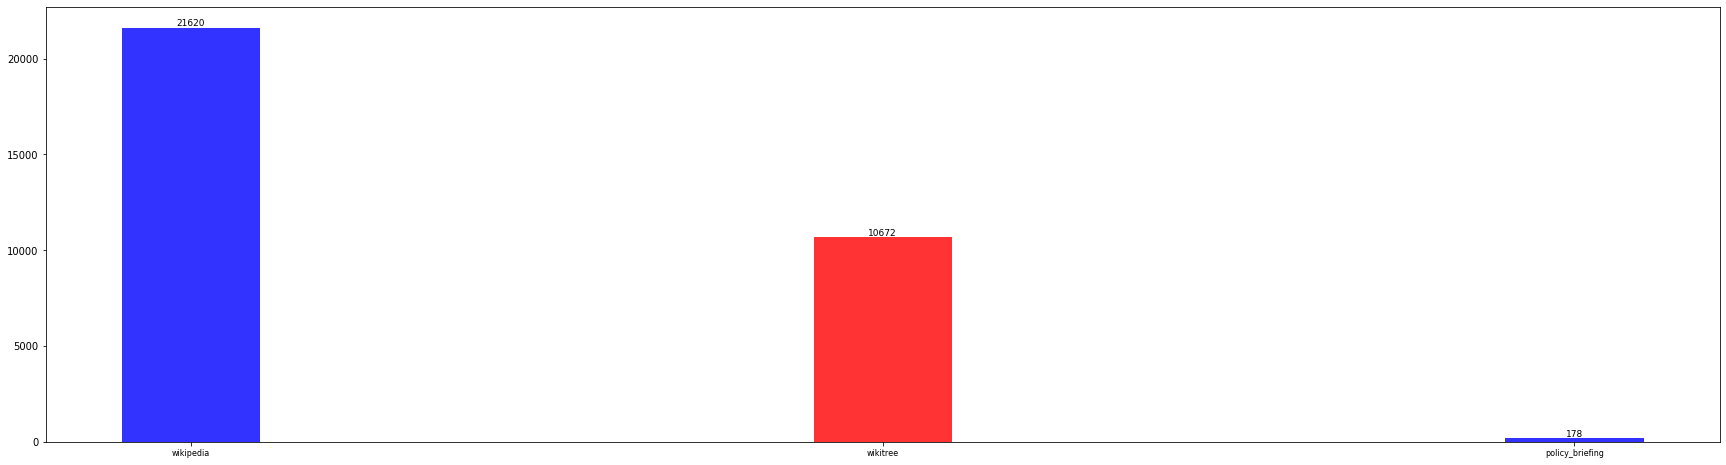

In [22]:
# source
source_label_count = train_df['source'].value_counts()

plt.figure(figsize=(30, 8))
# test_label_index = [i for i in range(len(source_label_count.keys()))]
# print(source_label_count.values)
plt.bar(source_label_count.keys(),  source_label_count.values, width=0.2, color=['blue','red','blue'], alpha=0.8)
plt.xticks(source_label_count.keys(), fontsize=8) # x축 값, 폰트 크기 설정
for i, v in enumerate(source_label_count.keys()):
    plt.text(v, source_label_count.values[i], source_label_count.values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

plt.show()